# 回帰の手順
# 0.はじめに
--- 
注意：　

1. 資料の中で「数学補足」となっているところは概念を数学で表した内容です。あとで興味ある方は見ておいてください（完成度低めなので意味不明と感じた方は連絡ください、加筆します）
2. (※このグラフはイメージです) とあるところは、プログラミングで読んでいるcsvではなく、説明のためのグラフであり、データは適当なものになっています。

この項目は、

* 「やさしく学ぶ機械学習のための数学のきほん」をベースに、
* 「おうちで学べる人工知能のきほん」
などの書籍を参考にしています。

再掲載
<img src="image/mlflow1.png">

[参考:Python 機械学習ことはじめ](https://speakerdeck.com/terapyon/python-ji-jie-xue-xi-kotohazime-at-odc)

# 1. データ選び・データ入手 
--- 
「x(広告費）」「y(クリック数）」の相関関係を見たいという意図で、この二つのデータをcsvで用意する。

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# csv表示用につき動作には影響しない
from pandas import Series,DataFrame
import pandas as pd
csv_path = 'click_before.csv'
# データのcsvの確認
dframe = pd.read_csv(csv_path)
dframe.columns =["x:広告費","y:クリック数"]
dframe

,x:広告費,y:クリック数
0,２３５,591
1,216,539
2,148,4１3
3,35,aaa310
4,8!!!!!!!5,308
5,204,519
6,49,325
7,25,wwww332
8,173,498ああああ
9,191,498


# 2. データ加工・データ連結
---
csvに数字以外の余計な情報があるので取り除く（クレンジング）

In [2]:
csv_path = 'click.csv'
# データのcsvの確認
dframe = pd.read_csv(csv_path)
dframe.columns =["x:広告費","y:クリック数"]
dframe

,x:広告費,y:クリック数
0,235,591
1,216,539
2,148,413
3,35,310
4,85,308
5,204,519
6,49,325
7,25,332
8,173,498
9,191,498


データ入手、加工についてより詳しく知りたい方は以下を参考

[参考:python-machinelearning-tutorial](https://github.com/terapyon/python-machinelearning-tutorial/blob/master/2-data-handling.ipynb)

# 3. 可視化
---

## 3-1. 目視で確認
---

データに相関関係がありそうか、図で見て把握する
（csvデータを二次元の散布図にする）

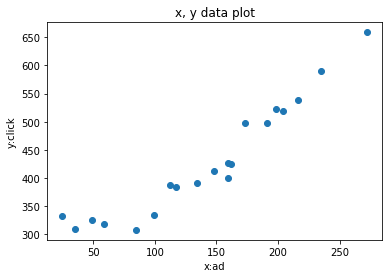

In [3]:
# プロットしたデータを確認する
# 学習データを読み込む
train = np.loadtxt(csv_path, delimiter=',', dtype='int', skiprows=1)
train_x = train[:,0]
train_y = train[:,1]
plt.title("x, y data plot")
plt.xlabel("x:ad")
plt.ylabel("y:click")
plt.plot(train_x, train_y, 'o')
plt.show()

## 3-2. 相関係数

---

以下の場合は、「[回帰具体事例（ゲームで考える課金施策）](回帰具体事例.ipynb)」でも登場した、「相関係数」を用いて「相関関係」の見込めるデータかを判断する

* 要素（変数）が「３種類以上」のデータ（3次元以上のグラフになり、目視判断が厳しくなるI
* 数値的な確証が欲しい

「x(広告費）」「y(クリック数）」のデータの「相関係数」を計算すると

* 0.95

であり、相関関係が強いとされる閾値「0.7」をはるかに超えているので、強い相関関係があると考えらえる

![相関係数](http://business.nikkeibp.co.jp/atclbdt/15/recipe/101500003/beer-diaper-13-1.png?__scale=w:235,h:114&_sh=08d03c0e00)

[参考:2つの支出データの類似度合いを示す「相関係数」](http://business.nikkeibp.co.jp/atclbdt/15/recipe/101500003/)

[数学補足:相関係数](数学説明.ipynb#相関係数)


# 4. 機械学習アルゴリズム選定
---

解決したい課題に合わせたロジックを選定する

#### 回帰の目的
「Aを使ったらBがどれだけ増えるか」という予測
(例：「x(広告費）をいくら使ったらy(クリック数）がどれだけ増えるか」を予測する式を導きたい)

#### 予測関数（選定ロジックのこと）
「一次関数」

以下のように、データの各点を通る直線を導き出すことを今回は考える。
<img src="image/answer1.png">

この直線のグラフは中学校で習った「一次関数」で表現可能

# 4-1. [予測関数]一次関数
---

## グラフの形
xが増減したらyがどれだけ増減するか　について示した直線を一次関数という
以下のようなイメージ

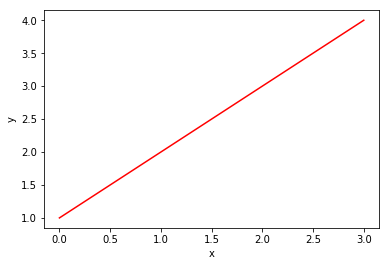

In [4]:
# 一次関数は次のような直線になる(一次関数説明用につき、今回の機械学習で使うデータとは関係ありません)
x = np.linspace(0,3,4)  # xの値域(0, 1, 2, 3)
y = x + 1               # 直線の式
plt.plot(x,y,"r-")      # 直線を引く
plt.xlabel("x")
plt.ylabel("y")
plt.show()              # グラフ表示

(※このグラフはイメージです)

## 一次関数の式
---
y = ax + b

#### a　傾き
直線の傾きの度合い（斜め具合）　つまり、xが1増えたときにyが変化する量
この例では2 ÷ 1= 2
<img src="http://media.qikeru.me/wp-content/uploads/2015/08/katamu5.png" width="70%">
(※このグラフはイメージです)

[参考:【中2数学】一次関数の傾きがわかる2つの求め方](http://media.qikeru.me/linear-function-slope/)

#### b 切片
---

一次関数のグラフがy軸と交わっている点

<img src="https://juken-mikata.sakura.ne.jp/wp-content/uploads/2017/02/69a319a853c93d311739087b06d7796c.png" width="70%">
(※このグラフはイメージです)

[参考：切片とは？超簡単！切片を一瞬で求める方法＆傾きとの違い](https://juken-mikata.net/how-to/mathematics/intercept.html)

## 機械学習での一次関数の表現
---
y = ax + bの式は、変形して、

$ f_{\theta}(x) = {\theta}_0 + {\theta}_1x $

とも表現可能です。

以下、a、bのパラメータをθとして説明します。

[数学補足:数式について](数学説明.ipynb#機械学習での一次関数の表現)

# 5. 機械学習モデル学習
---
## 手順

1. 予測関数のパラメータ($ {\theta}_0 + {\theta}_1x $) →　初期値はランダムに決定
2. (ランダム初期値のパラメータで作られた関数と、データの)「誤差」を「目的関数」で算出する
3. 「誤差」 の限りなく小さいパラメータを「最小二乗法」の考えで推定する
4. 「パラメータ更新手法」を使い、予測関数のパラメータを更新する
5. 誤差を限りなく減らしたところで回帰の学習が終了

* 「誤差」 データにフィットした関数からどれだけ離れているか
* 「目的関数」　データにフィットした関数からどれだけ離れているかの「誤差」を見るのに使う関数のこと。今回は「二乗誤差関数」を使用
* 「パラメータ更新手法」　今回は「最急降下法」を使う

以下、「誤差」「最小二乗法」（二乗誤差関数）「最急降下法」を説明


# 5-1.最小二乗法 [目的関数]二乗誤差関数
---
## ランダム初期パラメータでの予測関数のグラフ
予測関数の初期パラメータθはランダムで決定されるため、以下のように、データの各点を通る直線の式にはならない。

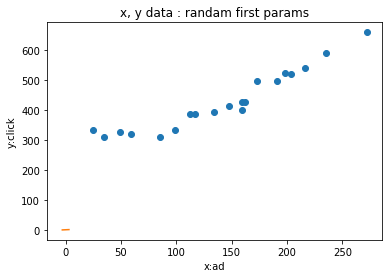

In [5]:
# パラメータを初期化
theta0 = np.random.rand()
theta1 = np.random.rand()

# 予測関数
def f(x):
    return theta0 + theta1 * x

# プロットして確認
x = np.linspace(-3, 3, 100)
plt.title("x, y data : randam first params")
plt.plot(train_x, train_y, 'o')
plt.xlabel("x:ad")
plt.ylabel("y:click")
plt.plot(x, f(x))
plt.show()

* 適当に決めたθを、データの各点を通る直線の式になるように更新する
* この適当に描かれたグラフがどれだけデータの各点を通る直線の式から離れているかを見る必要がある

## 誤差(二乗誤差関数)
---

各データのプロット位置と、一次関数の式の直線の通る位置のズレを「誤差」という
<img src="image/gosa.png" width="70%">

理想としては、
<img src="image/answer1.png">
このように、誤差が最小になる状態にすることである。

今回のケースで誤差を計算する目的関数を「二乗誤差関数」という。

具体的には、

* (「実際の値y」 - 「予測関数（今回は一次関数）にyに対応するxと適当なθを当てはめ算出された値」)の二乗

を全部のy、xを当てはめて計算した値を足した数
になります。

[数学補足:誤差を表現する数式について](数学説明.ipynb#誤差の表現)
[数学補足:誤差の和](数学説明.ipynb#誤差の和)
[数学補足:二乗誤差関数](数学説明.ipynb#二乗誤差関数)

## 最小二乗法
---

* 「誤差」が最も小さくなるパラメータ（θ）を見つけるアプローチの一つを「最小二乗法」という
* 「二乗誤差関数」で説明した通り、「誤差」は差を二乗して得られた数字を全部足した数だが、この二乗した値を最小にすることからこの名前がついている）

### パラメータの最小値
#### 二次関数のグラフ
* 「二乗」は二次式なので、誤差は、２次の項の係数が正の場合、以下のような下に凹んだ形になる
*  ２次の項とは、例えば「$ y = x^2 $」の場合、「$ x^2 \times 1 $」なので「1」。正（＋）

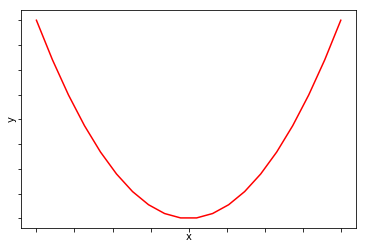

In [6]:
x = np.linspace(-4,4,20) # -4～4まで20刻みでxの値を生成
y = x**2           # 曲線の式(2次関数)
plt.plot(x,y,"r-")      # 曲線を引く
plt.xlabel("x")
plt.ylabel("y")
plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
plt.show()              # グラフ表示

(※このグラフはイメージです)

* 以下はθ0と誤差、θ1と誤差の関係を表した図
* 下に凹んだグラフの通り、一番凹んだところが誤差が最も小さいので、ここのθを求める

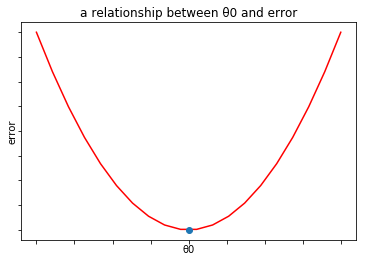

In [7]:
x = np.linspace(-4,4,20) # -4～4まで20刻みでxの値を生成
y = x**2           # 曲線の式(2次関数)
plt.title("a relationship between θ0 and error")
plt.plot(x,y,"r-")      # 曲線を引く
plt.plot(0, 0, 'o')
plt.xlabel("θ0")
plt.ylabel("error")
plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
plt.show()              # グラフ表示


(※このグラフはイメージです)

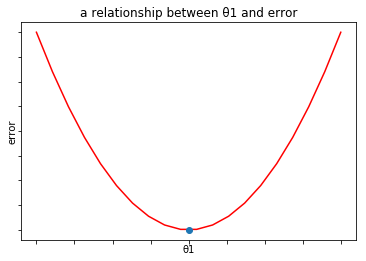

In [8]:
x = np.linspace(-4,4,20) # -4～4まで20刻みでxの値を生成
y = x**2           # 曲線の式(2次関数)
plt.title("a relationship between θ1 and error")
plt.plot(x,y,"r-")      # 曲線を引く
plt.plot(0, 0, 'o')
plt.xlabel("θ1")
plt.ylabel("error")
plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
plt.show() 

(※このグラフはイメージです)

* θの誤差が一番凹んだ場所になるようなθの値を見つけるために、パラメータを更新していく手法を使う

# 5-2. [パラメータ更新]最急降下法
---

## 微分
* パラメータの更新(「誤差が一番小さくなるθの値 = 誤差とθの関係性の二次元グラフの一番凹んだ部分」を求める)のために、「微分」の考えを使う
* 微分とは、「与えられた式における接線の傾きを得る」こと

* 例として、以下は「走行時間（車に乗って移動している時間）」と「速度」の関係を求めるグラフ
* 「走行時間」の範囲をどんどん狭くしていくと、「その瞬間の傾き」を得られる
<img src="image/bibun1.png" width="70%">
<img src="image/bibun2.png" width="70%">
<img src="image/bibun3.png" width="70%">
(※このグラフはイメージです)

[数学補足:微分](数学説明.ipynb#微分)

微分：関数のある点における「傾き・瞬間の変化量」

* 今回求めたい、二次元グラフの一番凹んだ部分というのは「傾きが0」の場所を指す
![傾きについて](http://www.phys.u-ryukyu.ac.jp/~maeno/sizensuugaku/katamukihenka.png)

[参考:自然科学のための数学2014年度第６講](http://www.phys.u-ryukyu.ac.jp/~maeno/sizensuugaku/lec6.html)

* なので、誤差を求める式をθでそれぞれ微分して0と置き、連立方程式を作って解けば、最小になるθを計算で求められる
* 今回は「$ {\theta}_0、 {\theta}_1x $」の２つのパラメータしかないから手で計算して最適な値を出すことも可能
* だが、パラメータが増えるほど計算が複雑になる
* 計算が大変なので、自動的にパラメータを更新させていく手法を機械学習では使う

## 反復法
---

* 自動的にパラメータ更新をする手法を「反復法」という
* ランダムに決めた値からスタートし、正しい値に近づくように少しずつパラメータを更新する
* 微分の値が「正」なら左、「負」なら右に値を動かすことで更新する

![反復法](image/hanpuku.png)
(※このグラフはイメージです)

## 最急降下法
---

* 反復法の中のたくさんある方法の一つ、「現在の傾き」を用いて値を更新するやり方を「最急降下法」という

[数学補足:微分](数学説明.ipynb#最急降下法)


# 6. 機械学習モデル評価 
---

* 最終的に決定したパラメータでの目的関数がどれだけデータに対して当てはまっているかを見る
* (回帰の評価には)「$R^2$（決定係数）」、「平均二乗誤差」などの手法がある
* 結果がもしも悪ければ、モデルの精度が低く、正しく予測することが難しい。その場合、データを見直したり、データを増やして再度、モデル学習を行う。

[参考：R^2 決定係数](https://bellcurve.jp/statistics/course/9706.html)
[参考:平均二乗誤差](http://www5e.biglobe.ne.jp/~emm386/2016/distance/euclid01.html)


## 6-1. 決定係数（回帰式の精度を見る）
---

* データに対する、推定された回帰式の当てはまりの良さ（回帰分析の精度）を表す。
* 「寄与率」「決定係数」「$R^2$」などと呼ばれている
* 0から1までの値を取り、精度が高いほど1に近づく
* 「実際のデータ」と「予測関数で求めた値」の２つの値の関係の強さ、を表す数値（単相関係数という）の二乗で求められる

上から順に決定係数「0.9」「0.6」「0.3」の場合のグラフ。
「0.9」が最も、データの間を通っているグラフであることが見て取れる。

![「0.9」「0.6」「0.3」](http://bellcurve.jp/statistics/wp-body/wp-content/uploads/2017/01/c8856789ec11ab8b1013037cef6929f9-8.png)
(※このグラフはイメージです)

注意: 決定係数がこの数値なら良い、という数学的な根拠は存在しない

[参考：R^2 決定係数](https://bellcurve.jp/statistics/course/9706.html)

## 6-2. 汎化性能(未知のデータへの対応能力の指標)
---

(今回はテストデータを用意していないので具体的なソースコードの説明は省きます…）

（与えた学習データだけでなく、）未知のデータへの対応能力を「汎化性能」と呼ぶ。

### 過学習
学習データだけに適応し、学習データに含まれないデータにうまく対応できない状況のこと。
学習データの個数に比較し、パラメータが大量でモデルが複雑すぎるのが原因。

### 未学習
データをまだ正しく掴み取れていない状態のこと。過学習とはトレードオフの関係にある

![過学習](http://image.gihyo.co.jp/assets/images/news/report/01/ptcon2017/0001/006.png)
(※このグラフはイメージです)

[参考:ゼロから作るDeel Learning 第６章]

[参考:PASONATECH CONFERENCE 2017イベントレポート](http://gihyo.jp/news/report/01/ptcon2017/0001)

[参考:TensorFlowで始める深層学習　(３)機械学習から深層学習の扉を開く](http://developers.gnavi.co.jp/entry/tensorflow-deeplearning-3)


# 7. 今回のデータでの事例

---

「x(広告費）」「y(クリック数）」のデータでは、プログラミングで394回の学習を実行した結果、

* $ {\theta}_0 = 429.0 $
* $ {\theta}_1= 93.4 $

が算出される。
これは、
広告費1円ごとに約1.39クリックを得られるという予測になる。（広告費ゼロでの初期値が230クリック）

[プログラミング参考](regression1_linear.ipynb)


# 8. 参考 
---

## その他のパラメータ更新方法

最急降下法の他に確率的勾配降下法などがある

- Momentum SGD　関連性のある方向へSGD（確率的勾配降下法）を加速させ振動を抑制する方法
- AdaGrad 勾配ベースの最適化アルゴリズム
- RMSprop 適応的学習率の方式
- AdaDelta Adagradの発展形で、急速かつ単調な学習率の低下を防ぐ手段を探る
- Adam それぞれのパラメータに対し学習率を計算し適応

[参考:勾配降下法の最適化アルゴリズムを概観する](http://postd.cc/optimizing-gradient-descent/#gradientdescentoptimizationalgorithms)

## 式展開で解くのとどう違うか？
パラメータが少ない場合、連立方程式を立てて解くことで手計算でも最適な値を求めることができるが、パラメータが多くなると連立方程式を解くことは難しくなる。
パラメータが増えても、機械学習を使うことで、シミュレーションで方程式を解くことができる。